# Building 2-layer maps - combining polygons and scatterplots
> In this chapter, you will learn how to create a two-layer map by first plotting regions from a shapefile and then plotting location points as a scatterplot. This is the Summary of lecture "Visualizing Geospatial Data in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Visualization]
- image: images/nashville_chicken_permits.png

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction

### Styling a scatterplot
In this exercise, you'll be using `plt.scatter()` to plot the father and son height data from the video. The `father_son` DataFrame is available in your workspace. In each scatterplot, plot `father_son.fheight` as x-axis and `father_son.sheight` as y-axis.



In [2]:
father_son = pd.read_csv('./dataset/father_son.csv', usecols=['fheight', 'sheight'])
father_son.head()

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


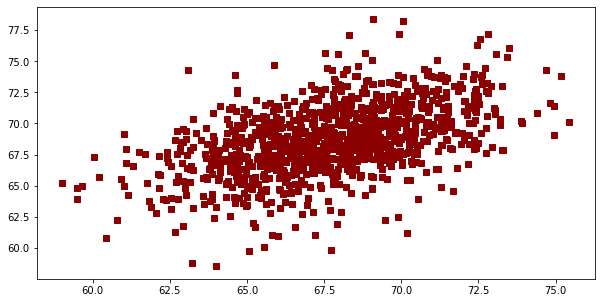

In [3]:
# Scatterplot 1 - father heights vs son heights with darkred square markers
plt.scatter(father_son.fheight, father_son.sheight, c='darkred', marker='s');

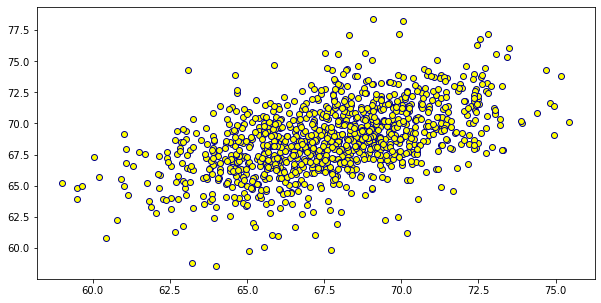

In [4]:
# Scatterplot 2 - yellow markers with darkblue borders
plt.scatter(father_son.fheight, father_son.sheight, c = 'yellow', edgecolor= 'darkblue');

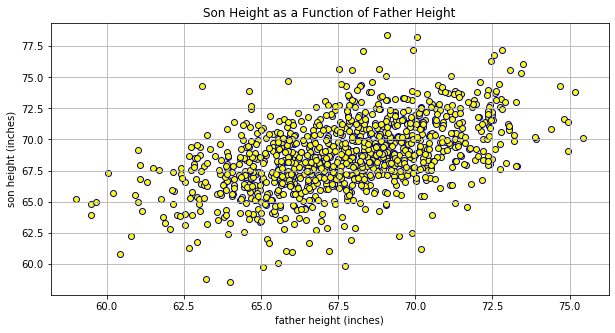

In [5]:
# Scatterplot 3
plt.scatter(father_son.fheight, father_son.sheight,  c = 'yellow', edgecolor = 'darkblue');
plt.grid();
plt.xlabel('father height (inches)');
plt.ylabel('son height (inches)');
plt.title('Son Height as a Function of Father Height');

### Plotting chicken locations
Now you will create a scatterplot that shows where the Nashville chickens are!


   Unnamed: 0  permit       city state    zip  district date_issued  \
0           0   288.0  Nashville    TN  37211      30.0  11/26/2014   
1           1   435.0  Nashville    TN  37211      19.0  05/18/2015   
2           2   270.0  Nashville    TN  37216       7.0  11/20/2014   
3           3   249.0  Nashville    TN  37216      25.0  12/29/2014   
4           4   200.0  Nashville    TN  37221      22.0  12/10/2014   

         lat        lng  
0  36.029132 -86.724578  
1  36.069132 -86.754578  
2  36.236134 -86.711204  
3  36.246134 -86.751204  
4  36.029367 -86.935290  


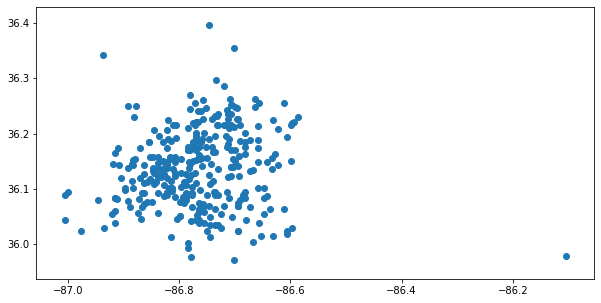

In [6]:
# Load the dataset
chickens = pd.read_csv('./dataset/chickens.csv')

# Look at the first few rows of the chickens DataFrame
print(chickens.head())

# Plot the locations of all Nashville chicken permits
plt.scatter(x=chickens.lng, y=chickens.lat);

We can see the relative location of the Nashville chickens using longitude for the x-axis and latitude for the y-axis. Next, now you'll up your game by plotting the locations on an actual map!

## Geometries and shapefiles
- Shapefiles
    - stores a special type of data known as geometry
        - Point
        - Line
        - Polygon
    - .shp : contains the geometry
    - .dbf : holds attributes for each geometry
    - .shx : links the attributes to the geometry

### Creating a GeoDataFrame & examining the geometry
Let's see where service districts are in Nashville.

> Note: if you use anaconda on windows, you must be faced in GDAL error. At that case, follow the instruction [here](https://www.hatarilabs.com/ih-en/how-to-install-python-geopandas-on-anaconda-in-windows-tutorial)

In [7]:
import geopandas as gpd

# Read in the services district shapefile and look at the first few rows
service_district = gpd.read_file('./dataset/ServiceDistricts.shp')
print(service_district.head())

# Print the contents of the service districts geometry in the first row
print(service_district.loc[0, 'geometry'])

   OBJECTID  AREA_SQ_MI                       Name  \
0         0         198    Urban Services District   
1         4         327  General Services District   

                                            geometry  
0  POLYGON ((1766078.549 711757.270, 1766000.028 ...  
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...  
POLYGON ((1766078.548749998 711757.2704166621, 1766000.027500004 711320.224999994, 1765989.023124993 711179.7158333361, 1765978.684791669 711047.7127083391, 1765969.593333334 710931.6260416657, 1765970.854791671 710911.9739583284, 1765987.92583333 710646.0770833343, 1765994.829999998 710537.9037500024, 1766055.331041664 709582.9231249988, 1766068.065416664 709495.3408333361, 1766097.510000005 709292.8383333385, 1766136.60041666 709024.618750006, 1766171.738958329 708781.1825000048, 1766290.361249998 708439.1691666692, 1766350.465208337 708265.8762499988, 1766632.597916663 707452.4270833284, 1766648.545416668 707414.4537499994, 1766950.391458333 706695.5177083313, 

The geometry field holds a series of latitude/longitude pairs that define the border of a polygon. Printing a geometry field gives all of the latitude/longitude pairs that make up the polygon boundary.

### Plotting shapefile polygons
The next step is to show the map of polygons. 

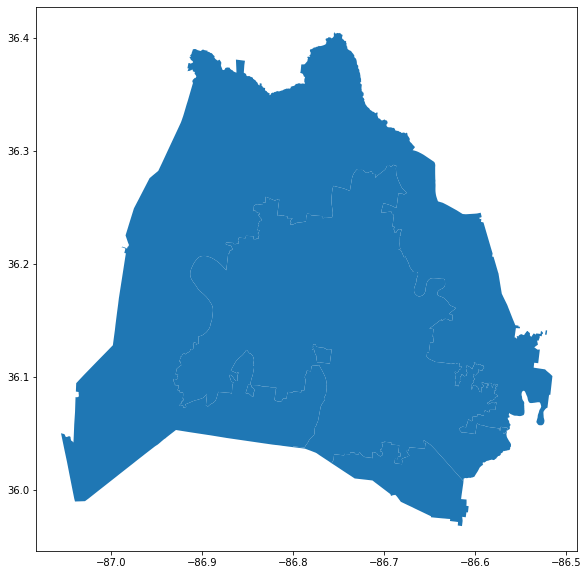

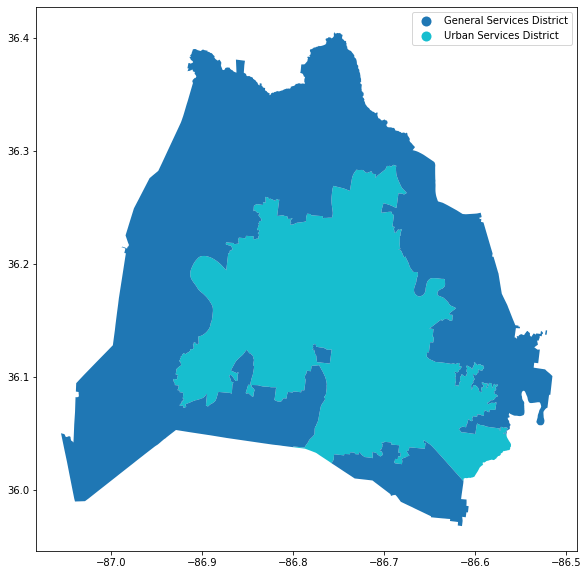

In [8]:
# Plot the Service Districts without any additional arguments
service_district.to_crs(epsg=4326).plot(figsize=(10, 10));

# Plot the Service Districts, color them according to name, and show a legend
service_district.to_crs(epsg=4326).plot(column='Name', legend=True, figsize=(10, 10));

## Scatterplots over polygons

### Plotting points over polygons - part 1
Make a basic plot of the service districts with the chicken locations. The packages needed have already been imported for you. The chickens DataFrame and service_district GeoDataFrame are in your workspace.

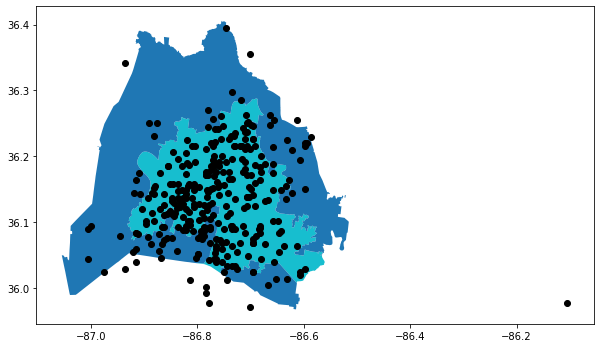

In [9]:
# Plot the service district shapefile
service_district.to_crs(epsg=4326).plot(column='Name', figsize=(10, 10));

# Add the chicken locations
plt.scatter(x=chickens.lng, y=chickens.lat, c='black');

### Plotting points over polygons - part 2
Plot the service districts and chicken permits together to see what story your visualization tells.

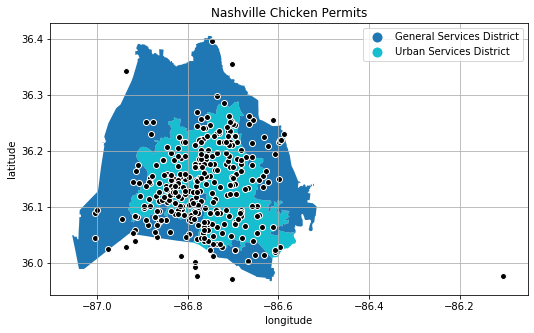

In [11]:
# Plot the service district shapefile
service_district.to_crs(epsg=4326).plot(column='Name', legend=True);

# Add the chicken locations
plt.scatter(x=chickens.lng, y=chickens.lat, c='black', edgecolor='white');

# Add labels and title
plt.title('Nashville Chicken Permits');
plt.xlabel('longitude');
plt.ylabel('latitude');

# Add grid lines
plt.grid();